In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# Set global font size
mpl.rcParams.update({'font.size': 14})  # Increase this value to increase the font size

def read_csv_files(data_frames, base_path, mdlArr, numArr, web, bgrArr, frqArr, bwdArr, owdArr, varArr, losArr, brsArr, schArr, stm):
    for j in range(len(schArr)):
        for l in range(len(brsArr)):
            for m in range(len(mdlArr)):
                file_path = os.path.join(base_path, f'{mdlArr[m]}-{numArr[0]}-{web}-{bgrArr[0]}-{frqArr[0]}-{bwdArr[0]}-{owdArr[0]}-{varArr[0]}-{losArr[0]}-{schArr[j]}-{stm}-{brsArr[l]}-time.csv')
                if os.path.exists(file_path):
                    df = pd.read_csv(file_path)
                    data_frames.append(df)
                else:
                    print(f"File not found: {file_path}")

def calculate_average(data_frames):
    averages = [np.mean(df.values, axis=0) for df in data_frames]
    return averages

def plot_data(level, averages, webArr, schArr, mdlArr, xlim):
    colors = ["darkslateblue", "darkgreen", "purple", "blue", "purple", "red", "red"]
    line_styles = ['dotted', 'dashed', 'dashdot', 'dashed', 'dotted', 'dashed', 'solid']
    fig, ax = plt.subplots(figsize=(4, 4))
    n = 0
    avgTime = 0
    label_mapping = {'LowLatency': 'minRTT'}  # Mapping from original label to custom label

    for brs in ["firefox"]:
        for i, stm in enumerate(schArr):
            custom_label = label_mapping.get(stm, stm)
            start = 0
            step = 1 / len(averages[n])
            x = np.insert(np.array(averages[n]), 0, 0)
            y = np.arange(0, len(averages[n])) * step + start
            y = np.insert(y, len(averages[n]), 1)
            ax.plot(x, y, color=colors[i], linestyle=line_styles[i], label=custom_label)
            avgTime += averages[n][-1]
            n += 1

    avgTime /= len(schArr)
    ax.set_xlabel('Page loading time (s)')
    ax.set_ylabel('CDF')
    ax.set_xlim(0, xlim)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)

    x1, x2, y1, y2 = 0.5, 1.2, 0.7, 1.0
    width_ratio = (x2 - x1) / (ax.get_xlim()[1] - ax.get_xlim()[0])
    height_ratio = (y2 - y1) / (ax.get_ylim()[1] - ax.get_ylim()[0])

    inset_width = width_ratio * ax.get_position().width * 1.5
    inset_height = height_ratio * ax.get_position().height * 1.5

    bbox = ax.get_position()
    inset_x = bbox.x0 + bbox.width * 0.4
    inset_y = bbox.y0 + bbox.height * 0.1
    axins = fig.add_axes([inset_x, inset_y, inset_width, inset_height])

    for i, stm in enumerate(schArr):
        custom_label = label_mapping.get(stm, stm)
        x = np.insert(np.array(averages[i]), 0, 0)
        y = np.arange(0, len(averages[i])) * step + start
        y = np.insert(y, len(averages[i]), 1)
        axins.plot(x, y, color=colors[i], linestyle=line_styles[i])

    axins.set_xlim(x1, x2)
    axins.set_ylim(y1, y2)
    axins.set_xticks([x1, x2])
    axins.set_yticks([y1, y2])
    rect = plt.Rectangle((x1, y1), x2-x1, y2-y1, edgecolor='black', facecolor='none', lw=1)
    ax.add_patch(rect)
    mark_inset(ax, axins, loc1=3, loc2=1, fc="none", ec="0.5", linestyle='dashed')

    plt.show()

level = "output/result-wireless"
base_path = os.path.join("..", level)
webArr = ["google.com"]
xlimArr = [1.9]

for i, web in enumerate(webArr):
    data_frames = []
    mdlArr = ["none"]
    numArr = ["1"]
    brsArr = ["safari"]
    bgrArr = ["0"]
    frqArr = ["0"]
    bwdArr = ["50"]
    owdArr = ["15"]
    varArr = ["10"]
    losArr = ["0.5"]
    stmArr = ["WRR", "SWRR"]
    schArr1 = ["RoundRobin", "LowLatency", "ECF", "Peekaboo", "QSAT", "FQSAT", "SAC"]
    read_csv_files(data_frames, base_path, mdlArr, numArr, web, bgrArr, frqArr, bwdArr, owdArr, varArr, losArr, brsArr, schArr1, stmArr[0])

    schArr2 = ["SAC"]
    read_csv_files(data_frames, base_path, mdlArr, numArr, web, bgrArr, frqArr, bwdArr, owdArr, varArr, losArr, brsArr, schArr2, stmArr[1])

    averages = calculate_average(data_frames)
    plot_data(level, averages, web, schArr1 + schArr2, mdlArr, xlimArr[i])


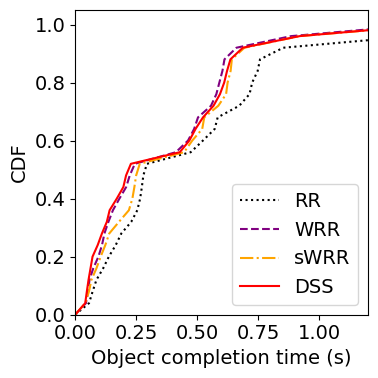

In [17]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# Tăng cỡ chữ toàn cục
mpl.rcParams.update({'font.size': 14})

def read_csv_files_for_stm(base_path, model_list, num_list, website, 
                           bgr_list, frq_list, bwd_list, owd_list, 
                           var_list, los_list, brs_list, sch_list, stm):
    """
    Đọc file CSV cho 1 'stm' cụ thể, dựa vào các tham số còn lại (sch_list, brs_list,...).
    Trả về list các DataFrame.
    """
    data_frames = []
    for sch in sch_list:
        for brs in brs_list:
            for mdl in model_list:
                file_name = (f"{mdl}-{num_list[0]}-{website}-{bgr_list[0]}-"
                             f"{frq_list[0]}-{bwd_list[0]}-{owd_list[0]}-"
                             f"{var_list[0]}-{los_list[0]}-{sch}-{stm}-{brs}-time.csv")
                file_path = os.path.join(base_path, file_name)

                if os.path.exists(file_path):
                    df = pd.read_csv(file_path)
                    data_frames.append(df)
                else:
                    print(f"Không tìm thấy file: {file_path}")
    return data_frames

def calculate_averages(data_frames):
    """
    Tính trung bình (mean) cho mỗi DataFrame theo chiều ngang (axis=0).
    Trả về 1 mảng numpy 1D.
    """
    if not data_frames:
        return np.array([])

    # Ghép tất cả DataFrame
    all_values = np.concatenate([df.values for df in data_frames], axis=0)
    mean_array = all_values.mean(axis=0)  # Tính trung bình theo cột
    return mean_array

def plot_cdf(averages, labels, x_limit):
    """
    Vẽ các đường CDF, mỗi đường tương ứng với 1 phần tử trong 'averages'.
    
    :param averages: Danh sách numpy 1D array. Mỗi array là dữ liệu trung bình của một 'stm'.
    :param labels: Danh sách nhãn (chính là các 'stm' đã map).
    :param x_limit: giới hạn tối đa trên trục X.
    """
    # Màu và kiểu nét
    colors = ["black", "purple", "orange", "red", 
              "orange", "red", "cyan", "magenta"]
    linestyles = ["dotted", "dashed", "dashdot", "solid", 
                  "dotted", "dashed", "dashdot", "solid"]

    fig, ax = plt.subplots(figsize=(4, 4))

    for i, (avg_array, label) in enumerate(zip(averages, labels)):
        if len(avg_array) == 0:
            # Nếu array rỗng => bỏ qua
            continue

        # Tạo trục X: thêm 0 ở đầu
        x = np.insert(avg_array, 0, 0)

        step = 1.0 / len(avg_array)
        # Tạo trục Y: 0 -> 1
        y = np.arange(0, len(avg_array)) * step
        y = np.insert(y, len(avg_array), 1.0)

        ax.plot(
            x, y,
            color=colors[i % len(colors)],
            linestyle=linestyles[i % len(linestyles)],
            label=label
        )

    ax.set_xlim(0, x_limit)
    ax.set_ylim(0, 1.05)
    ax.set_xlabel("Object completion time (s)")
    ax.set_ylabel("CDF")
    ax.legend(loc="lower right")

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # -----------------
    # THIẾT LẬP THAM SỐ
    # -----------------
    base_path = "../output/safari"
    website = "amazon.com"
    x_limit = 1.2

    model_list = ["none"]
    num_list   = ["1"]
    brs_list   = ["safari"]
    bgr_list   = ["0"]
    frq_list   = ["0"]
    bwd_list   = ["0"]
    owd_list   = ["0"]
    var_list   = ["8"]
    los_list   = ["1.5"]
    schArr     = ["LowLatency"]

    # Danh sách scheduling mechanisms (stmArr)
    stmArr = ["RR", "WRR", "SWRR", "NII"]

    # Mapping label để hiển thị đẹp hơn
    # NII -> DSS, SWRR -> sWRR
    label_mapping = {
        "NII":  "DSS",
        "SWRR": "sWRR"
    }

    # Ta sẽ đọc dữ liệu cho từng stm => vẽ 1 line/stm
    all_averages = []
    all_labels   = []  # Sẽ chứa label đã map

    for stm in stmArr:
        data_frames = read_csv_files_for_stm(
            base_path, model_list, num_list, website,
            bgr_list, frq_list, bwd_list, owd_list,
            var_list, los_list, brs_list, schArr,
            stm
        )
        avg_array = calculate_averages(data_frames)
        all_averages.append(avg_array)

        # Lấy label từ mapping (nếu có), không thì dùng stm làm mặc định
        mapped_label = label_mapping.get(stm, stm)
        all_labels.append(mapped_label)

    # Vẽ biểu đồ CDF 
    plot_cdf(all_averages, all_labels, x_limit)
